In [38]:
import numpy as np
from scipy.fftpack import fft,ifft
from scipy.signal import stft
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython
import soundfile as sf
import pyrubberband as pyrb
from tqdm import tqdm
import torchaudio

In [2]:
%matplotlib inline
# %matplotlib osx

In [11]:
fs, wav = wavfile.read('/home/yangwenhao/storage/dataset/CN-Celeb/eval/test/id00800-singing-01-001.wav')
f,t,zxx = stft(wav[:int(fs*3)], fs=fs, nperseg=0.025*fs, noverlap=0.01*fs, nfft=512, window=np.hamming(0.025*fs))
abs_zxx = np.absolute(zxx)
print(zxx.dtype)

complex64


In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
f,t,zxx = stft(wav[:int(fs*3)], fs=fs, nperseg=0.025*fs, noverlap=0.01*fs, nfft=512, window=np.hamming(0.025*fs))
abs_zxx = np.absolute(zxx)
print(zxx.dtype)

plt.pcolormesh(t, f, abs_zxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(1,2,2)
the_fs = int(fs*1.25)
f,t,zxx = stft(wav[:int(the_fs*3)], fs=the_fs, nperseg=0.025*the_fs, noverlap=0.01*the_fs, nfft=512, window=np.hamming(0.025*the_fs))
abs_zxx = np.absolute(zxx)
print(zxx.dtype)

plt.pcolormesh(t, f, abs_zxx)
# plt.imshow(abs_zxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

/tmp/ipykernel_124837/3956488695.py:11: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  b = librosa.effects.time_stretch(y, 1.25)
/tmp/ipykernel_124837/3956488695.py:16: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  b = librosa.effects.pitch_shift(y, sr, n_steps=-1)


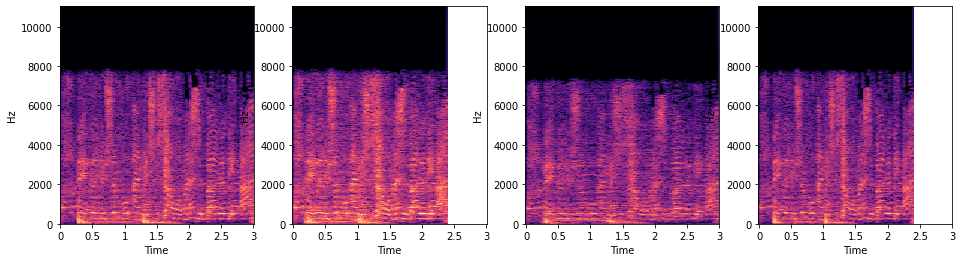

In [130]:
y, sr = librosa.load("/home/yangwenhao/storage/dataset/CN-Celeb/eval/test/id00800-singing-01-001.wav", duration=3)
fig, ax = plt.subplots(nrows=1, ncols=4, sharex=True, figsize=(16, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
# .label_outer()

b = librosa.effects.time_stretch(y, rate=1.25)
D = librosa.amplitude_to_db(np.abs(librosa.stft(b)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[1])

b = librosa.effects.pitch_shift(y, sr=sr, n_steps=-1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(b)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[2])

b = pyrb.time_stretch(y, sr, 1.25)
# b = librosa.effects.pitch_shift(y, sr, n_steps=-1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(b)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[3])

In [133]:
y, sr = librosa.load("/home/yangwenhao/storage/dataset/CN-Celeb/eval/test/id00800-singing-01-001.wav", duration=4)

IPython.display.Audio(y, rate=sr)

In [125]:
IPython.display.Audio(librosa.effects.pitch_shift(y, sr=sr, n_steps=2), rate=sr)

In [109]:
y, sr = librosa.load("/home/yangwenhao/storage/dataset/CN-Celeb/eval/test/id00800-speech-01-001.wav", duration=4)
IPython.display.Audio(y, rate=sr)

In [110]:
IPython.display.Audio(librosa.effects.pitch_shift(y, sr=sr, n_steps=-2), rate=sr)

In [134]:
IPython.display.Audio(pyrb.time_stretch(y, sr, 0.75), rate=sr)

In [80]:
IPython.display.Audio(librosa.effects.time_stretch(y, rate=1.5), rate=sr)

### Time Stetch-Based Audio augmentaion


#### 1. Pitch-shift              speaker-changed

#### 2. time_stretch Librosa     speaker-consistent

#### 3. time_stretch Pyrb        speaker-consistent

/home/yangwenhao/anaconda3/envs/py38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


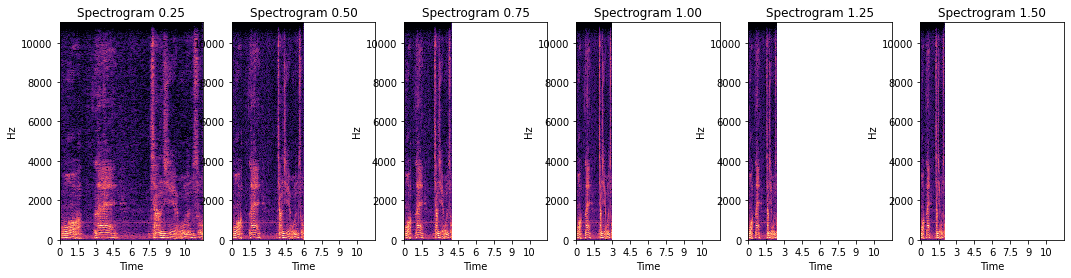

In [57]:
y, sr = librosa.load("0328.MP3", offset=3, duration=3)
sf.write('y.wav', y, sr)

durs = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
fig, ax = plt.subplots(nrows=1, ncols=len(durs), sharex=True, figsize=(18, 4))

for i, d in enumerate(durs):
    if d != 1.0:
        b = librosa.effects.time_stretch(y, rate=d)
    else:
        b = y
        
    D = librosa.amplitude_to_db(np.abs(librosa.stft(b)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax[i])
    ax[i].set_title('Spectrogram {:.2f}'.format(d))

In [1]:
from speechbrain.pretrained import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb",
                                               savedir="pretrained_models/spkrec-ecapa-voxceleb")

/home/yangwenhao/anaconda3/envs/py38/lib/python3.8/site-packages/huggingface_hub/utils/_deprecation.py:39: FutureWarning: Pass library_name=False as keyword args. From version 0.8 passing these as positional arguments will result in an error
  warnings.warn(


Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [37]:
sf.write('y_0.5.wav', librosa.effects.time_stretch(y, rate=0.5), sr)
sf.write('y_0.25.wav', librosa.effects.time_stretch(y, rate=0.25), sr)

In [45]:
import matplotlib.pyplot as plt
import os

In [ ]:
scores_str = []
for i in range(80):
    dur = (i+1) / 40
    if not os.path.exists('./data/y_{:.4f}.wav'.format(dur)):
        sf.write('./data/y_{:.4f}.wav'.format(dur), librosa.effects.time_stretch(y, rate=dur), sr)
    
    score, prediction = verification.verify_files("./data/y_{:.4f}.wav".format(dur), "./y.wav") # Different Speakers
    scores_str.append([dur, float(score), float(prediction)])

scores_str_np = np.array(scores_str)
# plt.plot(scores_np[:, 0], scores_np[:, 2], marker='.')

In [81]:
scores_strrb = []
for i in range(80):
    dur = (i+1) / 40
    if not os.path.exists('./data_pyrb/y_{:.4f}.wav'.format(dur)):
        sf.write('./data_pyrb/y_{:.4f}.wav'.format(dur), pyrb.time_stretch(y, sr, dur), sr)
    
    score, prediction = verification.verify_files("./data_pyrb/y_{:.4f}.wav".format(dur), "./y.wav") # Different Speakers
    scores_strrb.append([dur, float(score), float(prediction)])

scores_strrb_np = np.array(scores_strrb)
# plt.plot(scores_np[:, 0], scores_np[:, 2], marker='.')

In [ ]:
y_len = len(y)
scores = []
for i in range(40):
    dur = (i+1) / 40
    if not os.path.exists('./data_cut/y_{:.4f}.wav'.format(dur)):
        sf.write('./data_cut/y_{:.4f}.wav'.format(dur) , y[:int(y_len*dur)], sr)
    score, prediction = verification.verify_files("./data_cut/y_{:.4f}.wav".format(dur), "./y.wav") # Different Speakers
    scores.append([dur, float(score), float(prediction)])

scores_np = np.array(scores)

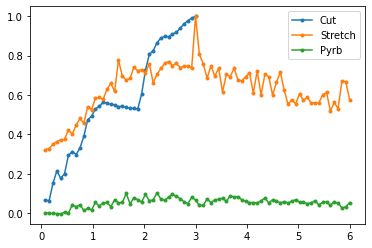

In [131]:
plt.plot(scores_np[:, 0]*3, scores_np[:, 1], marker='.')
plt.plot(scores_str_np[:, 0]*3, scores_str_np[:, 1], marker='.')
plt.plot(scores_strrb_np[:, 0]*3, scores_strrb_np[:, 1], marker='.')

plt.legend(['Cut', 'Stretch', 'Pyrb'])

In [77]:
IPython.display.Audio(y, rate=sr)

In [32]:
IPython.display.Audio(librosa.effects.time_stretch(y, rate=0.8), rate=sr)

In [33]:
IPython.display.Audio(librosa.effects.time_stretch(y, rate=1.25), rate=sr)

In [11]:
IPython.display.Audio(librosa.effects.time_stretch(y, rate=1.5), rate=sr)

In [19]:
from speechbrain.lobes.augment import TimeDomainSpecAugment
import torch

In [26]:
t = TimeDomainSpecAugment(sample_rate=sr, speeds=[75])

y_t = t(torch.tensor(y).unsqueeze(0), torch.tensor(len(y)/sr).unsqueeze(0))

In [28]:
print(y.shape, y_t.shape)

(220500,) torch.Size([1, 165370])


In [27]:
IPython.display.Audio(y_t[0].numpy(), rate=sr)

In [83]:
fs, wav = wavfile.read('../data/Nov26_23_11.wav')

In [84]:
f,t,zxx = stft(wav[:,0], fs=fs, nperseg=0.025*fs, noverlap=0.01*fs, nfft=2048, window=np.hamming(0.025*fs))
abs_zxx = np.absolute(zxx)
# print(zxx.dtype)

In [85]:
print(wav.shape)
print(f.shape)
print(t.shape)
print(zxx.shape)

(309120, 2)
(1025,)
(431,)
(1025, 431)


/tmp/ipykernel_124837/1628218448.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f[:240], abs_zxx[:240, :])


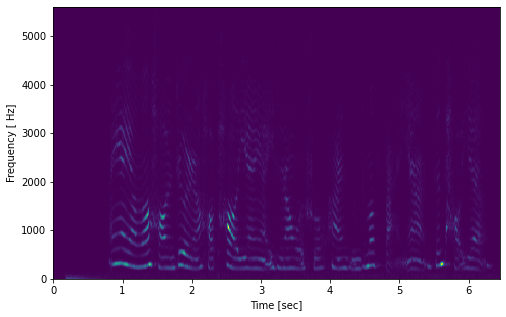

In [86]:
plt.figure(figsize=(8,5))
plt.pcolormesh(t, f[:240], abs_zxx[:240, :])
plt.ylabel('Frequency [ Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [16]:
f, t, Sxx = scipy.signal.spectrogram(wav, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=- 1, mode='psd')

In [ ]:
# f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
wav.shape

In [147]:
uid2path = {}
data_dir = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb_v2/dev'

with open(data_dir+'/wav.scp', 'r') as f:
    for l in f.readlines():
        uid = l.split()[0]
        path = l.split()[4]
        
        uid2path[uid] = path

error_uid = set([])     
with open(data_dir + '/utt2dur', 'r') as f:
    for l in tqdm(f.readlines()):
        uid = l.split()[0]
        dur = float(l.split()[1])
        y = sf.read(uid2path[uid])[0]
        
        if len(error_uid) > 10:
            break
            
        try:
            assert np.abs(len(y)/16000 - dur) <= 0.01
        except Exception as e:
            error_uid.add(uid)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107953/107953 [02:04<00:00, 867.95it/s]


In [148]:
print(len(error_uid))

0


In [37]:
y, sr = audio, sample_rate = sf.read('/home/ssd2020/yangwenhao/dataset/CN-Celeb_flac/data/id00081/play-02-115-new.flac',
                                     dtype='int16', start=13421, stop=61421)

In [153]:
y.shape

(61440,)

In [32]:
y, sr = sf.read('/home/ssd2020/yangwenhao/dataset/CN-Celeb_flac/data/id00081/play-02-115.flac', dtype='int16',)

In [33]:
y.shape

(61440,)

In [36]:
sf.write('/home/ssd2020/yangwenhao/dataset/CN-Celeb_flac/data/id00081/play-02-115-new.flac', y, sr)

In [29]:
IPython.display.Audio(y, rate=sr)

In [35]:
sf.default_subtype('flac')

'PCM_16'

In [41]:
import torch

In [39]:
vad = torchaudio.transforms.Vad(sample_rate=sr)

In [42]:
y_vad = vad(torch.tensor(y))

In [52]:
y_vad[-500:]

tensor([ -2144,  -1814,  -1123,    140,   1719,   3098,   3898,   3997,   3759,
          3954,   4810,   5767,   6041,   5387,   4252,   3171,   2404,   2005,
          1783,   1400,    677,   -348,  -1474,  -2398,  -2769,  -2538,  -2104,
         -1843,  -1760,  -1698,  -1626,  -1525,  -1136,   -427,    263,    693,
           994,   1097,    623,     24,    433,   2329,   4738,   5901,   5139,
          3133,   1208,    716,   1721,   3058,   3317,   1707,  -1067,  -3751,
         -5355,  -5497,  -5095,  -5093,  -5701,  -6802,  -7913,  -8646,  -8320,
         -6556,  -4600,  -3619,  -3403,  -2858,  -1116,   1199,   3391,   5201,
          6179,   6558,   6746,   7285,   8320,   8909,   8580,   7636,   6304,
          5026,   3874,   2785,   1722,    319,  -1316,  -2926,  -4372,  -5160,
         -5188,  -4639,  -3977,  -3832,  -3955,  -3804,  -3210,  -2232,  -1145,
           -29,    949,   1474,   1653,   1562,   1520,   2380,   4769,   8211,
         11012,  11440,   9208,   5713, 

In [46]:
IPython.display.Audio(y_vad.numpy(), rate=sr)